# 共享单车数据分析——数据可视化

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


#### 字段描述
项目数据描述如下：

(1) datetime：日期，以年-月-日 小时的形式给出。 

(2) season：季节。1 为春季, 2为夏季,3 为秋季,4 为冬季。

(3) hodliday：是否为假期。1代表是，0代表不是。 

(4) workingday：是否为工作日，1代表是，0代表不是。 

(5) weather:天气： 

    1: 天气晴朗或者少云/部分有云。 
    2: 有雾和云/风等。 
    3: 小雪/小雨，闪电及多云。 
    4: 大雨/冰雹/闪电和大雾/大雪。   
    
(6) temp - 摄氏温度。 

(7) atemp - 人们感觉的温度。 

(8) humidity - 湿度。 

(9) windspeed - 风速。 

(10) casual -随机预定自行车的人数 

(11) registered - 登记预定自行车的人数。 

(12) count - 总租车数，即casual+registered数目。 

其中10~12不属于特征，12为我们需要预测的值。

### 时间单独处理

这里我们并不打算做一个时间序列模型，所以，我们把时间看成一种周期性的特征。为了更好地处理时间特征，需要将时间中的月、日和小时单独分出。

In [17]:
df['month'] = pd.DatetimeIndex(df.datetime).month
df['day'] = pd.DatetimeIndex(df.datetime).dayofweek
df['hour'] = pd.DatetimeIndex(df.datetime).hour
df = df.drop('datetime',axis=1)

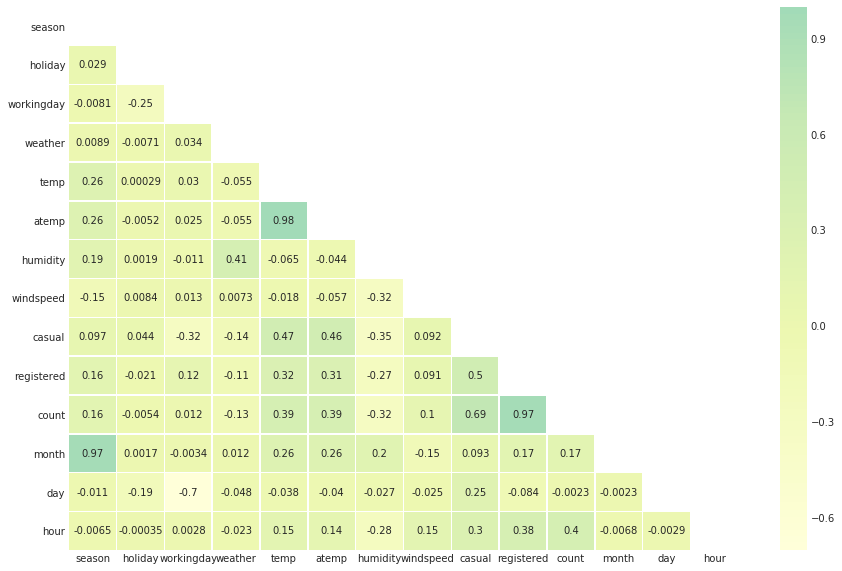

In [37]:
fig = plt.figure(figsize=(15,10))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(df.corr(),annot = True,center=2,linewidth=.5,cmap="YlGnBu",mask=mask)

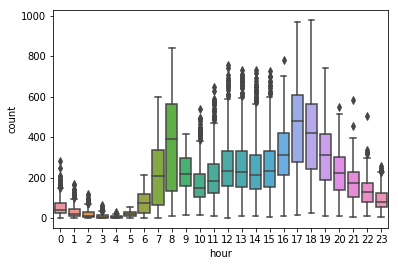

In [11]:
sns.boxplot(x = 'hour',y = 'count',data=df)

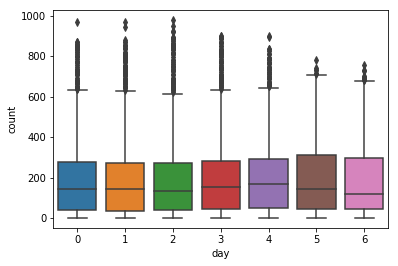

In [12]:
sns.boxplot(x='day',y='count',data=df)

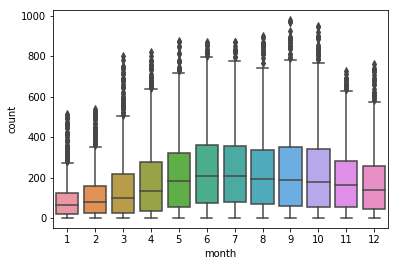

In [14]:
sns.boxplot(x='month',y='count',data=df)

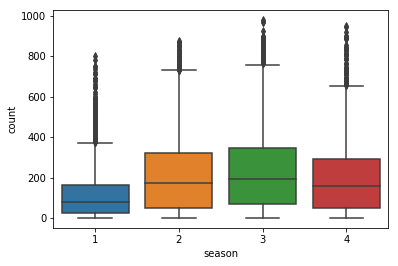

In [15]:
sns.boxplot(x='season',y='count',data=df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
dtypes: float64(3), int64(11), object(1)
memory usage: 1.2+ MB


In [5]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

def score(yp,y):
    logp = np.log(yp+1)
    loga = np.log(y+1)
    return np.sqrt(np.mean((logp-loga) ** 2))

x = df.drop(['datetime','casual','registered'],axis=1)
y = df['count']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)
rg = RidgeCV(alphas = [1e-5,1e-4,1e-3,1e-2,1e-1,1])
rg.fit(x_train,y_train)
yp_rg = rg.predict(x_test)
score(yp_rg,y_test)

0.016972183830813177

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
yp_rf = rf.predict(x_test)
score(yp_rf,y_test)

0.0014446577988555846

In [7]:
yp = (yp_rg + yp_rf)/2
score(yp,y_test)

0.008275401508777085